# HW1  Try out gradient descent


You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

**1) [5 points]** Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^6+ 3w^4 - 15w^3 + w^2 + 10w - 50 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(6w^5 + 12w^3 - 45w^2 + 2w + 10 \right)$


**2) [25 points]** Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [2]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha,max_its,w0):
    ##Your code here
    # Initialize variables
    w = w0
    cost_history = []  # List to store cost history for each iteration
    
    
    #g(w)
    def g(w):
        return (1/50) * (w**6 + 3 * w**4 - 15 * w**3 + w**2 + 10 * w - 50)
    # g'(w)
    def dg(w):
        return (1/50) * (6 * w**5 + 12 * w**3 - 45 * w**2 + 2 * w + 10)

    cost_history.append(g(w)) # append the initial cost
    
    # Perform gradient descent
    for i in range(max_its):
        # Compute the gradient
        gradient = dg(w)
        
        # Update w using the gradient descent rule
        w = w - alpha * gradient
        
        cost = g(w)
        
        # Store the cost in the history
        cost_history.append(cost)
        
    return cost_history

**3) [10 points]** Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).


$w^0$ = 2.0
w0 = 2.0
max_its = 2000

# first run
alpha1 = 0.01

# second run
alpha2 = 0.001

# third run
alpha3 = 0.0001



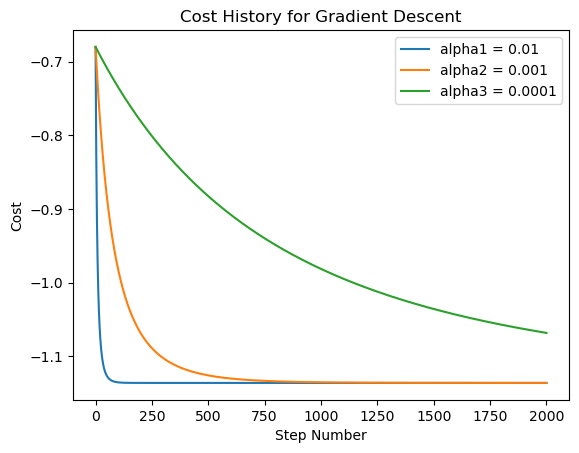

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

#define vars
w0 = 2.0
max_its = 2000

# First run
alpha1 = 0.01
v1 = gradient_descent(alpha1, max_its, w0)

# Second run
alpha2 = 0.001
v2 = gradient_descent(alpha2, max_its, w0)

# Third run
alpha3 = 0.0001
v3 = gradient_descent(alpha3, max_its, w0)

# Plot the cost histories for all three runs
plt.plot(range(max_its + 1), v1, label="alpha1 = 0.01")
plt.plot(range(max_its + 1), v2, label="alpha2 = 0.001")
plt.plot(range(max_its + 1), v3, label="alpha3 = 0.0001")

# Add labels and title
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost History for Gradient Descent")

# Add a legend
plt.legend()

# Display the plot
plt.show()


**For the next few problems we will be comparing fixed and diminishing learning rates**

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

**4) [5 points]** Is this function convex? If no, why not? If yes, where is its global minimum?

Yes, its global minimum is at zero.

**5) [5 points]** What is the derivative of the cost function?

$$ \frac{x}{|x|} $$  (it is undefined at 0)


**6) [20 points]** Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function.

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [12]:
!pip install autograd

In [133]:
from autograd import grad
import numpy as np 

def g(w):
    return np.abs(w)
    
def gradient_descent(g, alpha, max_its, w0):
    #def gradient function
    gradient = grad(g) 
    # def vars
    w = w0               # Initialize the weight
    cost_history = []     # List to store the cost at each iteration
    weight_history = []   # List to store the weight at each iteration
    cost_history.append(g(w))
    weight_history.append(w)
    
    # Perform gradient descent
    for i in range(1, max_its):
        # Compute the gradient at the current weight w
        grad_value = gradient(w)
        
        # Update the weight using the gradient descent rule
        w = w - alpha * grad_value
        
        # Calculate the cost at this step
        cost = g(w)  # Use the provided cost function g to calculate the cost at w
        
        # Store the current weight and cost in their respective histories
        weight_history.append(w)
        cost_history.append(cost)
        
    return weight_history, cost_history

**7) [10 points]** Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

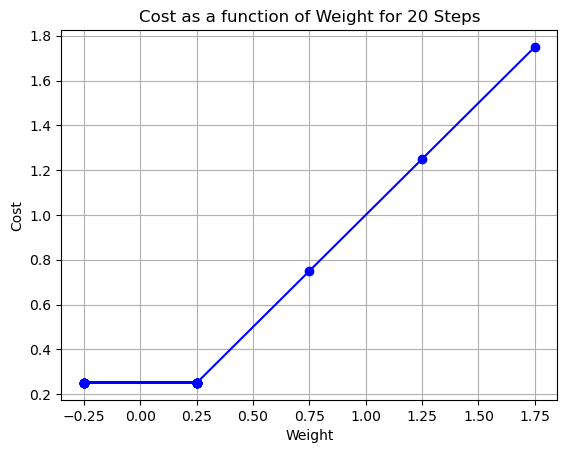

In [136]:
w0 = 1.75          # Initialization
alpha = 0.5        # Learning rate
max_its = 20       # Number of iterations

# Run gradient descent
weights, costs = gradient_descent(g, alpha, max_its, w0)

# Plot cost as a function of weight
plt.plot(weights, costs, marker='o', color='b')
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.title("Cost as a function of Weight for 20 Steps")
plt.grid(True)
plt.show()

**8) [15 points]** Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and wieght history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

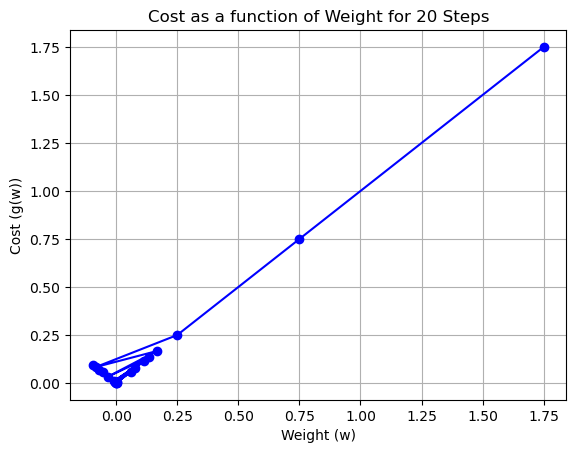

In [127]:
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   
     # Initialize variables
    w = w0              # Initialize the weight
    cost_history = []    # List to store the cost at each iteration
    weight_history = []  # List to store the weight at each iteration
    cost_history.append(g(w)) #store the initial values
    weight_history.append(w)
    
    if alpha=='diminishing':
        # Perform gradient descent with a = 1/k
        for i in range(1, max_its):
            # Compute the gradient at the current weight w
            grad_value = gradient(w)

            # Diminishing learning rate rule: a = 1/k
            # calculate a:
            alpha_d = 1/i

            # Update the weight using the gradient descent rule
            w = w - alpha_d * grad_value
            
            # Calculate the cost at this step
            cost = g(w)  # Use the provided cost function g to calculate the cost at w
            
            # Store the current weight and cost in their respective histories
            weight_history.append(w)
            cost_history.append(cost)
        
        return weight_history, cost_history

    ## If we arent't using the diminishing alpha
    else:
        # Perform gradient descent with given alpha
        for i in range(1, max_its):
            # Compute the gradient at the current weight w
            grad_value = gradient(w)
            
            # Update the weight using the gradient descent rule
            w = w - alpha * grad_value
            
            # Calculate the cost at this step
            cost = g(w)  # Use the provided cost function g to calculate the cost at w
            
            # Store the current weight and cost in their respective histories
            weight_history.append(w)
            cost_history.append(cost)
            
        return weight_history, cost_history
    

w0 = 1.75          # Initialization
alpha = 'diminishing' # 1/k
max_its = 20       # Number of iterations

# Run gradient descent
weights, costs = gradient_descent(g, alpha, max_its, w0)

# Plot cost as a function of weight
plt.plot(weights, costs, marker='o', color='b')
plt.xlabel("Weight (w)")
plt.ylabel("Cost (g(w))")
plt.title("Cost as a function of Weight for 20 Steps")
plt.grid(True)
plt.show()

**9) [10 points]**  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach would be better? Write your justification?

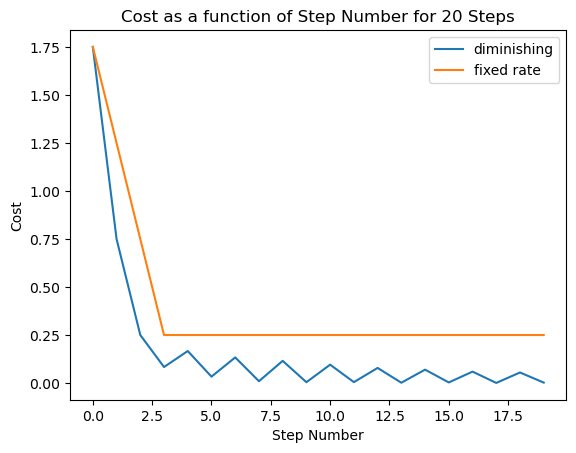

In [130]:
w0 = 1.75          # Initialization
alpha_d = 'diminishing' # 1/k
max_its = 20       # Number of iterations

# Run gradient descent
weights1, costs1 = gradient_descent(g, alpha_d, max_its, w0)


alpha = 0.5        # Learning rate

# Run gradient descent
weights2, costs2 = gradient_descent(g, alpha, max_its, w0)

# Plot
plt.plot(range(max_its), costs1, label="diminishing")
plt.plot(range(max_its), costs2, label="fixed rate")

plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost as a function of Step Number for 20 Steps")
plt.legend()
plt.show()

We know that the answer we are looking for is 0, but in the fixed learning rate example, we never hit our goal of zero. Therefore, the diminishing learning rate is the better option because it narrows in on the correct answer without overshooting.ax

**We will now look at the oscilating behavior of gradient descent.**

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

**10) [5 points]** Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [99]:
import autograd.numpy as np

def g(w):
    return w[0]**2 + w[1]**2 + 2 * np.sin(1.5 * (w[0] + w[1])) + 2
    
def gradient_descent(g, alpha, max_its, w0):
    #def gradient function
    gradient = grad(g) 
    # def vars
    w = np.array(w0)      # make w an array
    cost_history = []     # List to store the cost at each iteration
    weight_history = []   # List to store the weight at each iteration
    cost_history.append(g(w))
    weight_history.append(w)
    
    # Perform gradient descent
    for i in range(1, max_its+1):
        # Compute the gradient at the current weight w
        grad_value = gradient(w)
        
        # Update the weight using the gradient descent rule
        w = w - alpha * grad_value
        
        # Calculate the cost at this step
        cost = g(w)  # Use the provided cost function g to calculate the cost at w
        
        # Store the current weight and cost in their respective histories
        weight_history.append(w)
        cost_history.append(cost)
        
    return weight_history, cost_history

**11) [10 points]** Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



#### The diminishing alpha leads to oscillating behavior

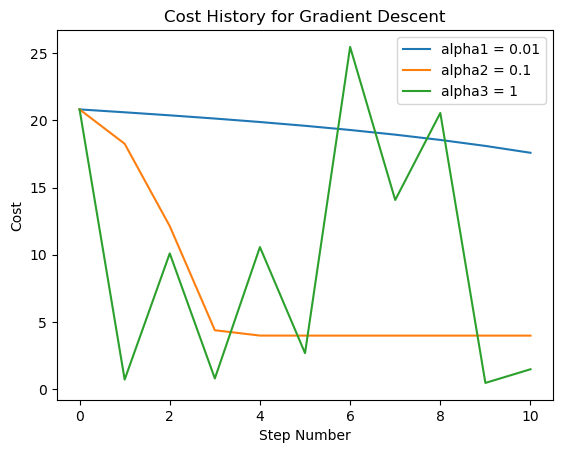

In [102]:
#define vars
w0 = [3.0, 3.0]
max_its = 10

# First run
alpha1 = 0.01
v1 = gradient_descent(g, alpha1, max_its, w0)

# Second run
alpha2 = 0.1
v2 = gradient_descent(g, alpha2, max_its, w0)

# Third run
alpha3 = 1
v3 = gradient_descent(g, alpha3, max_its, w0)

# Plot the cost histories for all three runs
# The costs are the second element in the list returned by the function

plt.plot(range(max_its + 1), v1[1], label="alpha1 = 0.01")
plt.plot(range(max_its + 1), v2[1], label="alpha2 = 0.1")
plt.plot(range(max_its + 1), v3[1], label="alpha3 = 1")

# Add labels and title
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost History for Gradient Descent")

# Add a legend
plt.legend()

# Display the plot
plt.show()

**12) [15 points]** This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (***using your intuition; Hint: you should try with alpha values smaller than 0.1***). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

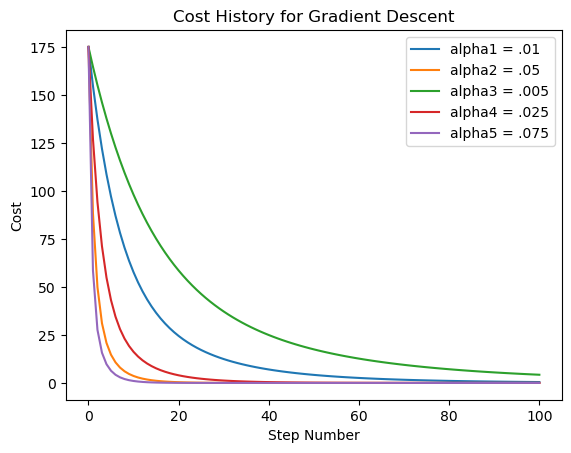

In [104]:
#define g:
def g(w):
    return 2 * w[0]**2 + w[1]**2 + 4 * w[2]**2
    
#define vars
w0 = [5.0, 5.0, 5.0]
max_its = 100

# First run
alpha1 = 0.01
v1 = gradient_descent(g, alpha1, max_its, w0)

# Second run
alpha2 = 0.05
v2 = gradient_descent(g, alpha2, max_its, w0)

# Third run
alpha3 = .005
v3 = gradient_descent(g, alpha3, max_its, w0)

# Fourth run run
alpha4 = .025
v4 = gradient_descent(g, alpha4, max_its, w0)

# Fifth run
alpha5 = .075
v5 = gradient_descent(g, alpha5, max_its, w0)

# Plot the cost histories for all three runs
# The costs are the second element in the list returned by the function

plt.plot(range(max_its + 1), v1[1], label="alpha1 = .01")
plt.plot(range(max_its + 1), v2[1], label="alpha2 = .05")
plt.plot(range(max_its + 1), v3[1], label="alpha3 = .005")
plt.plot(range(max_its + 1), v4[1], label="alpha4 = .025")
plt.plot(range(max_its + 1), v5[1], label="alpha5 = .075")

# Add labels and title
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost History for Gradient Descent")

# Add a legend
plt.legend()

# Display the plot
plt.show()

The best alpha out of the ones that I tried was .075

thanks for grading :)